#### Heba AlJassir

# T5 Online Data Science Bootcamps for SDAIA Academy

##### 2022 T5 PROJECT 

Welcome to my Project. 

In this Project I will perform Exploratory Data Analysis , data visualizations and Modling of the body performance.
For EDA,I am using Python programming language, for data visualization,I am using Matplotlib and Seaborn and for data modling,I am using sketlearn.

# DESCRIPTION
The age-performance relationship describes changes in the organism’s structural and functional capabilities over the course of the lifespan. With an increasing interest in features that characterize this pattern, such as the rate of growth, age of peak performance, and rate of decline with aging.
There has always been a large interest in the physiological limits of mankind. Measuring human capabilities in physical or cognitive.

Performance decline isn’t just about physical changes, however. As we age, our intrinsic motivation to train diminishes. Even in athletes, the motivation to train may shift somewhat from setting personal records to remaining active and healthy. And that’s a great motivation for any athlete at any age.



# 

# Context

I will be using “Body performance Data.csv” data set that contains 12 columns and 13.3 K Rows

### Content

- data shape : (13393, 12)

- age : 20 ~64

- gender : F,M

- height_cm : (If you want to convert to feet, divide by 30.48)

- weight_kg

- body fat_%

- diastolic : diastolic blood pressure (min)

- systolic : systolic blood pressure (min)

- gripForce

- sit and bend forward_cm

- sit-ups counts

- broad jump_cm

- class : A,B,C,D ( A: best) / stratified


 ### 13393 rows × 12 columns


# 

# Our goal is :
In this project, I will use ML to predict the body performance and how does the age, height ,weight and gender affect exercise performance.
This is the data that confirmed the grade of performance with age and some exercise performance data.

# 

In [2]:
# importing the necessary libraraies
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra


# visualization imports
import matplotlib.pyplot as plt 
import seaborn as sns  # for advanced data visualizations
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score,f1_score ,plot_confusion_matrix

% matplotlib inline



UsageError: Line magic function `%` not found.


In [4]:
#loading data file
df = pd.read_csv('bodyPerformance.csv') 

# 

# We will start with Data EDA !!

In [5]:
# Take a look at the first few rows
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [6]:
#Gives a basic overview of all the columns present in our dataset.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [7]:
# How many rows and columns does the dataset have?
df.shape


(13393, 12)

In [8]:
# provides information on numerical data in our dataset.
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


# 

## Let's Clean The Data

In [9]:
df.isna()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,False,False,False,False,False,False,False,False,False,False,False,False
13389,False,False,False,False,False,False,False,False,False,False,False,False
13390,False,False,False,False,False,False,False,False,False,False,False,False
13391,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Checking for null values in the dataset
df.isnull().values.any()

False

In [11]:
# Checking which columns contain null values
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

## Luckily we don't have any null values. 

# 

# Matplotlib and Seaborn Visualizations

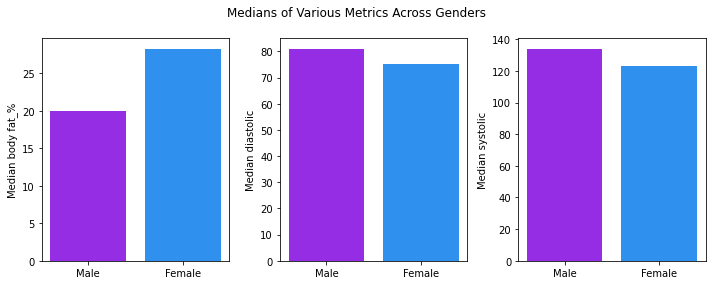

In [12]:
fig, axes = plt.subplots(ncols = 3, figsize=(10,4))
cats = ['body fat_%','diastolic','systolic']

for i in range(len(cats)):
    data = df.groupby('gender')[cats[i]].median()
    
    axes[i].bar('Male',data.loc['M'], color='#942de3')
    axes[i].bar('Female',data.loc['F'], color='#2f91ed')
    
    axes[i].set_ylabel('Median ' + cats[i])

fig.suptitle('Medians of Various Metrics Across Genders')
fig.tight_layout()
plt.show()

<AxesSubplot:ylabel='gender'>

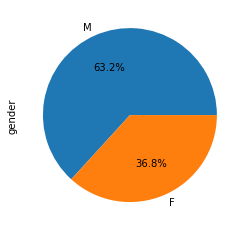

In [13]:
#Gender Distribution
round(df['gender'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

### We found that the percantage of male is higher than female percantage (the number of males is double the number of females)





# 

<AxesSubplot:xlabel='gender', ylabel='count'>

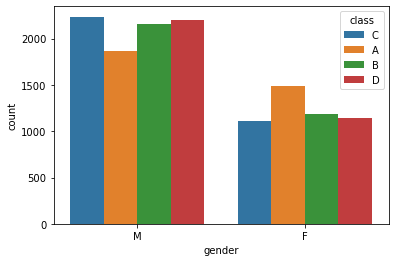

In [14]:
#Class Distribution w.r.t gender
sns.countplot(x = df['gender'], data = df, hue = df['class'])

# 

<AxesSubplot:ylabel='class'>

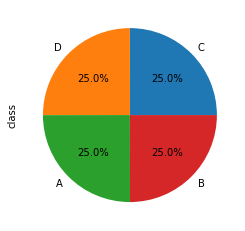

In [15]:
#Classes Distribution
round(df['class'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

### the 4 classes are equally distributed in this data.

.


<AxesSubplot:xlabel='age', ylabel='Count'>

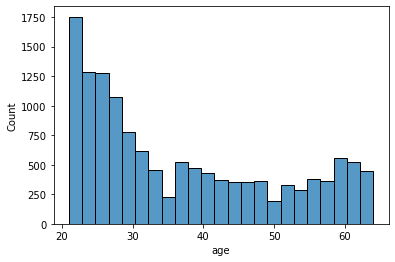

In [16]:
#Age Distribution
sns.histplot(data = df,x = 'age')

<Figure size 792x504 with 0 Axes>

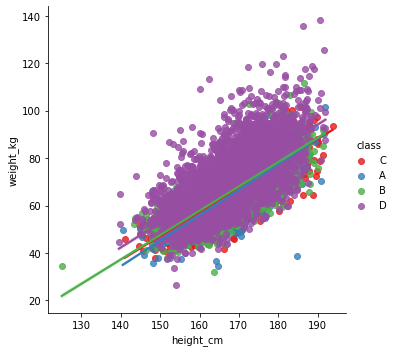

In [17]:
plt.figure(figsize=(11,7))
sns.lmplot(y='weight_kg',x='height_cm',data=df,hue='class'
           ,palette='Set1')

### we can see there is Positive Strong Correlation between weight and hight .

.

# 

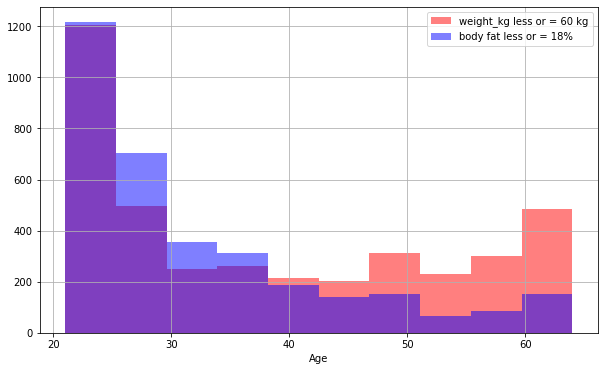

In [18]:
plt.figure(figsize=(10,6))
df[df['weight_kg']<=60]['age'].hist(alpha=0.5,color='red',bins=10,label='weight_kg less or = 60 kg')
df[df['body fat_%']<=18]['age'].hist(alpha=0.5,color='blue',bins=10,label='body fat less or = 18%')


plt.xlabel('Age')
plt.legend()

### * From above histogram we can see the individuals who are young have low weight and low body fat

# 

##### Here , I will try to deduce which individuals are in which class . To decide that, I will be plotting some of the features present in the dataset.

##### Let's first analyze the relation between the weight and the score on different tests.

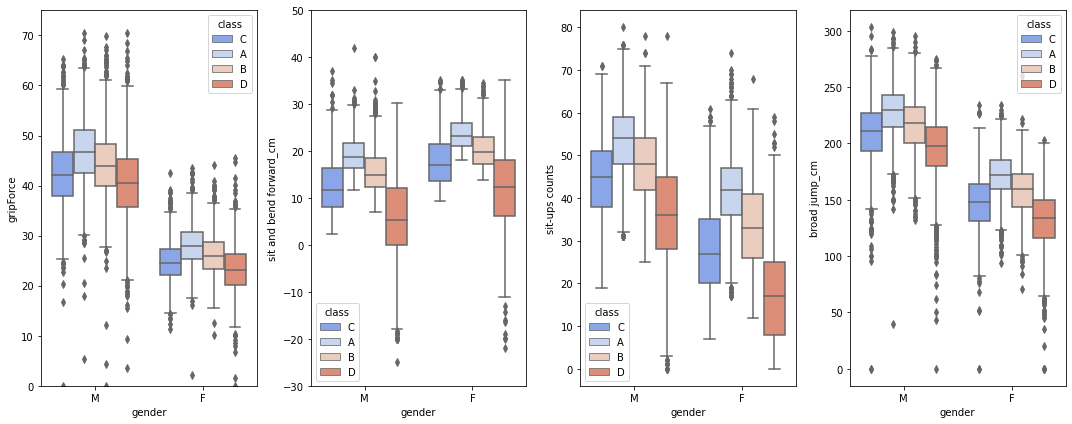

In [19]:
fig, axes = plt.subplots(ncols = 4, figsize=(15,6))
cats = ['gripForce','sit and bend forward_cm','sit-ups counts','broad jump_cm']
for i in range(len(cats)):
    sns.boxplot(x='gender',y=cats[i],data=df,palette='coolwarm',ax=axes[i],hue='class')
axes[0].set_ylim(0,75)
axes[1].set_ylim(-30,50)
fig.tight_layout()
plt.show()


#### Taking a look at the charts plotted we can say that :
- class (D) for individuals are heavier, on average, than the other individuals. It is also important to notice that, the heavier the individual, the better gripForce score. In the the sit-ups and broad jump tests, it seems to be a positive correlation between weight and better results but it is not as high as the previous one.



# 

### Now, let's compare it with the age.

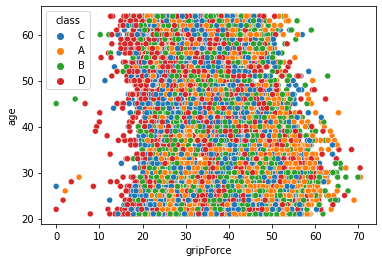

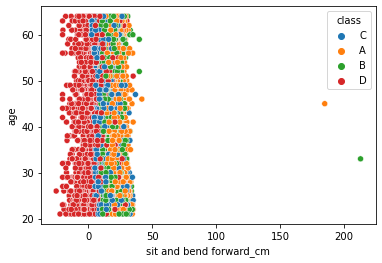

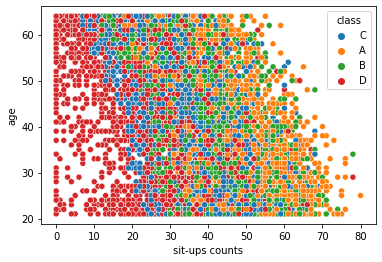

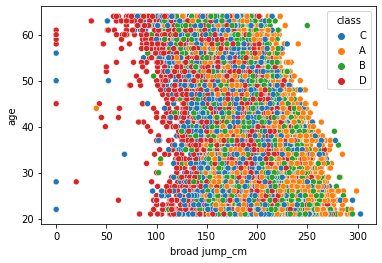

In [20]:
# Age comparison plot
for i in cats:
    plt.figure()
    sns.scatterplot(data=df, x=i, y='age', hue='class')
    plt.show()

#### From the above charts, we can also get two important insights:

- The younger the individual, the better the score.
- Individuals from class A and B are, on average, older than the rest of the dataset.


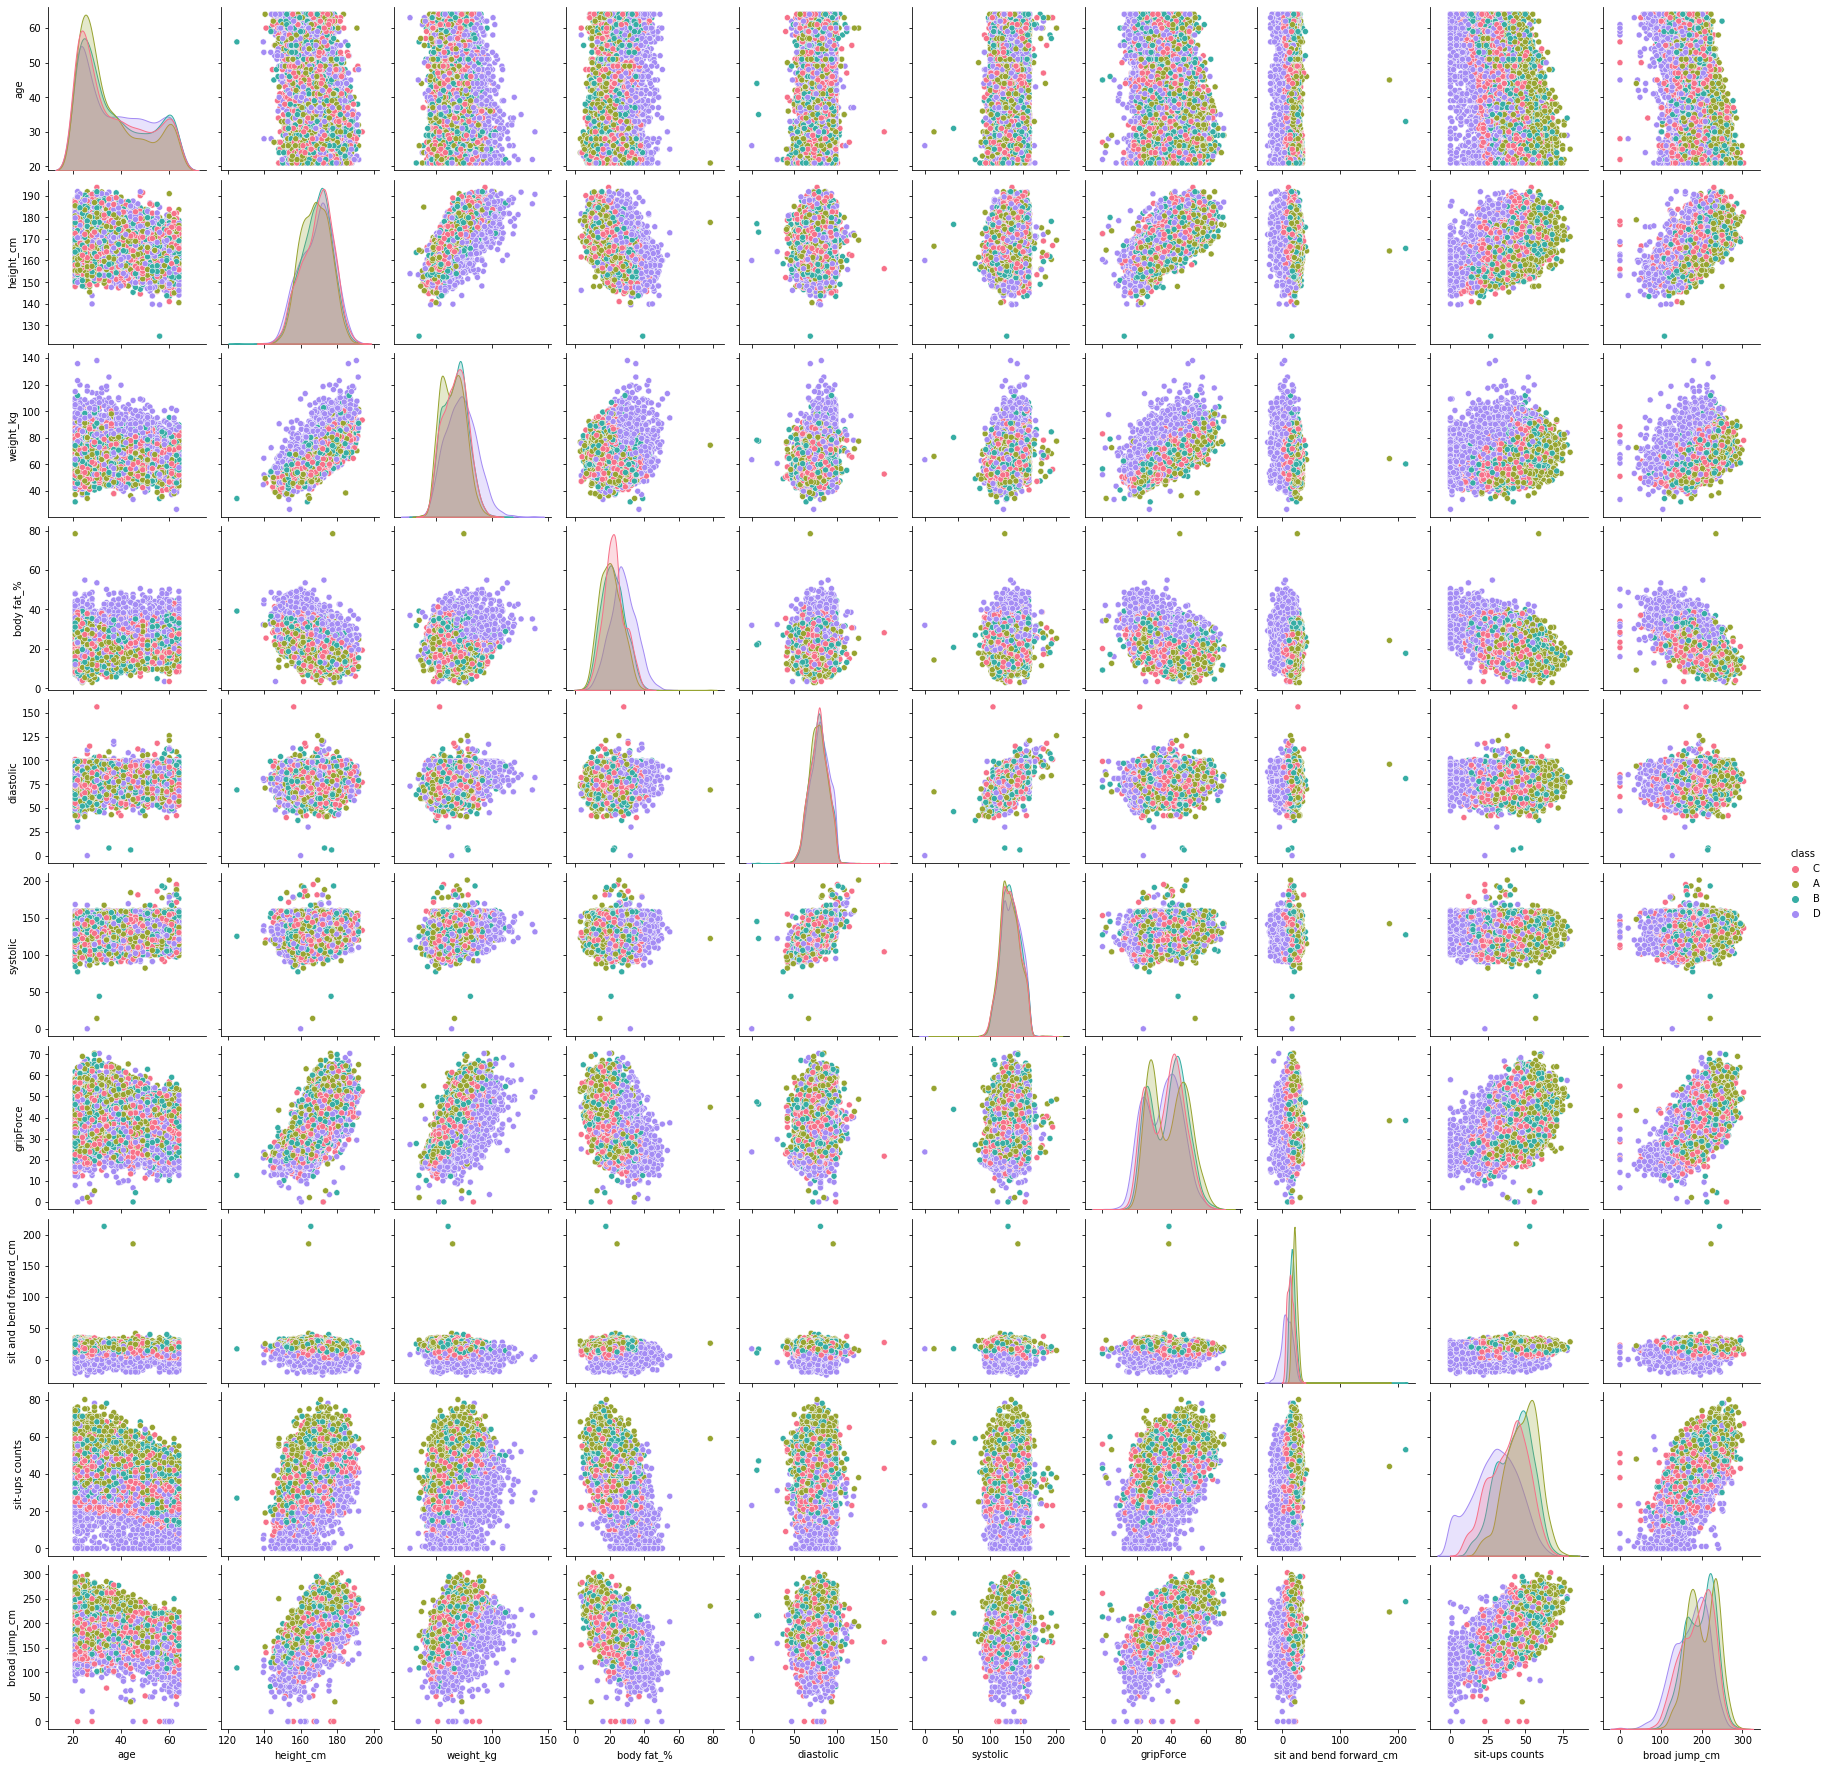

In [21]:
sns.pairplot(df, hue="class", palette="husl");

# 

# 

# 

# Preprocessing for modeling 

As we can see, there are 'gender' and 'class' columns as strings . In this dataset we will do Label Encoding to (gender, class) columns.. 

In [22]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [23]:
df['gender'].value_counts()

M    8467
F    4926
Name: gender, dtype: int64

In [24]:
df['class'].value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [25]:
## now we will copy the data 
df2=df.copy()



In [26]:
## Label Encoding to (gender, class) columns
df2.replace("M", 0 , inplace = True)
df2.replace("F", 1 , inplace = True)

In [27]:
df2.replace("A", 0 , inplace = True)
df2.replace("B", 1 , inplace = True)
df2.replace("C", 2 , inplace = True)
df2.replace("D", 3 , inplace = True)

In [28]:
df2.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [29]:
df2.shape

(13393, 12)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  int64  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.2 MB


# 

## Correlation Matrix for the data

<AxesSubplot:>

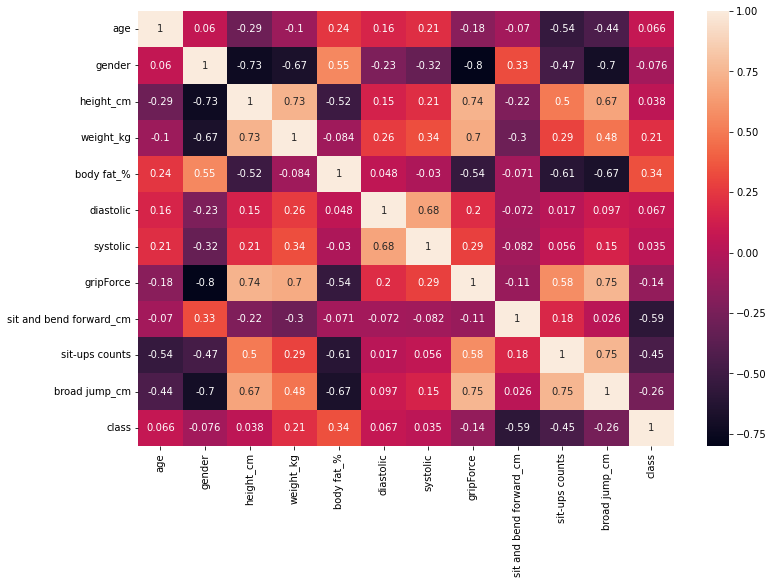

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap( df2.corr(), annot = True)

# Conclusions from crr matrix:

1. there is high relation between the Height and BroadJump this indicates that More Height is strongly related to higher BroadJump.

2. there is high relation between the Height and GripForce this indicates that More Height is strongly related to more GripForce.

3. there is high relation between the Height and Weight this indicates that More Height is strongly related to more Weight.

4. there is high relation between the Weight and GripForce this indicates that More Weight is strongly related to more GripForce.

5. there is relation between Systolic and Diastolic.

6. there is high relation between the GripForce and BroadJump this indicates that More GripForce is strongly related to higher BroadJump.

7. there is high relation between the Sit-ups counts and BroadJump this indicates that More Sit-ups counts is strongly related to higher BroadJump.

# 

# 

# split The Data

In [32]:
X = df2.drop("class" , axis = 1)
y = df2['class'].values

In [33]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [34]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler ()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [35]:
X_train

array([[ 1.39802328e+00, -7.66473887e-01, -1.17074955e+00, ...,
         8.53393223e-01, -6.85692604e-01, -6.03852034e-01],
       [-1.08606473e+00,  1.30467589e+00,  9.40616122e-02, ...,
        -2.77262910e-01, -8.97101089e-01, -5.28414686e-01],
       [ 9.59654808e-01, -7.66473887e-01,  4.36860899e-01, ...,
         3.21798211e-02,  7.23697299e-01, -3.52394208e-01],
       ...,
       [-7.20757666e-01,  1.30467589e+00, -5.03708148e-04, ...,
         7.34376788e-01,  5.12288814e-01, -2.01519513e-01],
       [-1.15912614e+00,  1.30467589e+00,  1.17702942e-01, ...,
         6.03458709e-01,  2.30410833e-01, -6.03852034e-01],
       [-1.08606473e+00, -7.66473887e-01,  4.25040234e-01, ...,
         1.74999543e-01,  1.42839225e+00,  8.79749136e-01]])

In [36]:
X_test

array([[-1.15418623,  1.33043523, -0.15936918, ..., -2.2222845 ,
        -1.30039814, -2.402404  ],
       [ 0.40902296, -0.75163373, -0.77214459, ...,  0.00600765,
         0.8332278 ,  0.71028398],
       [-0.03760824, -0.75163373,  1.17431848, ...,  1.30584474,
         0.35144129,  1.78104865],
       ...,
       [ 1.74891654, -0.75163373,  0.57355827, ..., -0.30734593,
        -0.95626493,  0.13754939],
       [-0.4098009 ,  1.33043523, -1.64925449, ..., -0.09844354,
        -1.57570472, -1.0826243 ],
       [-0.8564321 , -0.75163373,  0.32123899, ..., -1.34025219,
         0.00730808,  0.61067797]])

# 

# KNN Model 

In [37]:
# apply logistic regression
from sklearn.neighbors import KNeighborsClassifier
kclf = KNeighborsClassifier(n_neighbors=6 )
kclf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [38]:
kclf_score_train = kclf.score(X_train,y_train)
kclf_score_test = kclf.score(X_test,y_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = kclf.fit(X_train, y_train).predict(X_test)

In [40]:
target_names = ['Class A', 'Class B', 'Class C', 'Class D']
print(classification_report(y_test, y_predict, target_names = target_names))

              precision    recall  f1-score   support

     Class A       0.61      0.81      0.70       857
     Class B       0.42      0.45      0.44       824
     Class C       0.56      0.52      0.54       800
     Class D       0.93      0.63      0.75       868

    accuracy                           0.61      3349
   macro avg       0.63      0.60      0.61      3349
weighted avg       0.64      0.61      0.61      3349



In [41]:
f1_score(y_test,y_predict,average='weighted')

0.6103664161096508

In [42]:
accuracy_score(y_test,y_predict)

0.6070468796655718

# 

## Logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
lr_score_train = lr.score(X_train,y_train)
lr_score_test = lr.score(X_test,y_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = lr.fit(X_train, y_train).predict(X_test)

In [46]:
target_names = ['Class A', 'Class B', 'Class C', 'Class D']
print(classification_report(y_test, y_predict, target_names = target_names))

              precision    recall  f1-score   support

     Class A       0.70      0.71      0.71       857
     Class B       0.45      0.44      0.44       824
     Class C       0.53      0.56      0.54       800
     Class D       0.81      0.77      0.79       868

    accuracy                           0.62      3349
   macro avg       0.62      0.62      0.62      3349
weighted avg       0.63      0.62      0.63      3349



In [47]:
f1_score(y_test,y_predict,average='weighted')

0.6250104119859377

In [48]:
accuracy_score(y_test,y_predict)

0.6240668856375038

# 

## Random Forest Model

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
rf_score_train = rf.score(X_train,y_train)
rf_score_test = rf.score(X_test,y_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = rf.fit(X_train, y_train).predict(X_test)

In [52]:
target_names = ['Class A', 'Class B', 'Class C', 'Class D']
print(classification_report(y_test, y_predict, target_names = target_names))

              precision    recall  f1-score   support

     Class A       0.75      0.84      0.79       857
     Class B       0.62      0.63      0.62       824
     Class C       0.71      0.70      0.71       800
     Class D       0.92      0.81      0.86       868

    accuracy                           0.75      3349
   macro avg       0.75      0.74      0.75      3349
weighted avg       0.75      0.75      0.75      3349



In [53]:
f1_score(y_test,y_predict,average='weighted')

0.7477287948255165

In [54]:
accuracy_score(y_test,y_predict)

0.746491489997014

# 

# 

### Now we can compare the accuracies between our models 
### [ train & test ]

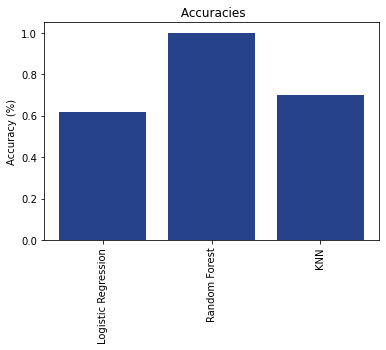

In [55]:
predictors_group = ('Logistic Regression','Random Forest','KNN')
x_pos = np.arange(len(predictors_group))
accuracies = [lr_score_train, rf_score_train, kclf_score_train]
    
plt.bar(x_pos, accuracies, align='center', color='#26428b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title(' Accuracies')
plt.show()

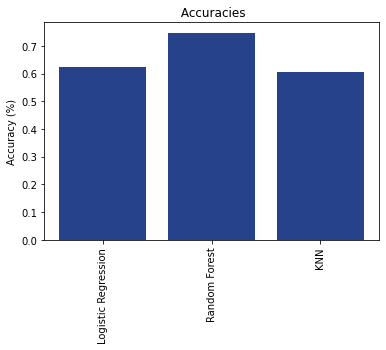

In [56]:
predictors_group = ('Logistic Regression','Random Forest','KNN')
x_pos = np.arange(len(predictors_group))
accuracies = [lr_score_test, rf_score_test, kclf_score_test]
    
plt.bar(x_pos, accuracies, align='center', color='#26428b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title(' Accuracies')
plt.show()

# From the histograms above we figure that [ Random Forest] model is more accurate

# 

# CONCLUSIONS
. From the data analyzed, we can draw the conclusion that body performance decreases during the years and males and females have different strenghts. 

. In this case, females were more flexible while males did better in strenght tests.

. Also, a higher bodyfat can lead to bad body performance and higher blood pressure.

# 

# Thank You !

# 